# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Andrea Sala - Settembre 2020</span>
# <span style="color:darkgreen">  Esercitazione 4</span>

Il codice simula la dinamica molecolare di un sistema di particelle di Argon in fase solida, liquida e gassosa in una scatola cubica a partire da una configurazione *fcc*, integrando le equazioni del moto ripetutamente ed estraendo valori istantanei e mediati di grandezze fisiche quali energia e temperatura.
Durante la scrittura del codice e l'analisi dati ho utilizzato i seguenti parametri:
- `npart` = 108 particelle
- `nblock` = 50 blocchi
- `nsteps` = 500 misure per ogni blocco

## Esercizio 4.1

1. <span style="color:red">Improve the MD code by enabling (you should insert this option via a boolean-like variable in the input file) the **possibility** to **(re)start** reading not only a **actual** spatial configuration [$\vec{r}(t)$] file but also an **old** spatial configuration [$\vec{r}(t-dt)$] file</span> (files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature</span>.
3. In your report, put some pictures which show that you have been able to equilibrate the thermodynamic phases at the beginning of your simulations.

The typical required operations when the re-start option will be enabled are:
1. read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files
2. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t)$ compute $\vec{v}(t+dt/2)$; finally obtain the actual temperature $T(t+dt/2)$
3. by comparing $T(t+dt/2)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
4. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation
6. Do not forget to use **periodic boundary contitions** every time it is appropriate!

This will help you, especially in the equilibration phases of your simulations.

L'esercizio richiedeva di migliorare il codice già fornito aggiungendo la possibilità di ripartire da una configurazione già esistente. Questa feature (attivabile da una variabile intera `Re_Start` e copiando nei file `config.0 `e `old.0` i risultati delle simulazioni appena terminate) permette di leggere dunque due configurazioni spaziali delle particelle, senza il bisogno di generare in modo casuale le velocità iniziali. Conoscendo $\vec{r}(t)$ e $\vec{r}(t-dt)$ da input sono in grado di performare un passo con l'Algoritmo di Verlet e ricavare $\vec{r}(t+dt)$: in questo modo posso ricavare $\vec{r}(t+dt/2)$ e quinid ottenere un valore della temperatura istantanea del sistema $T(t+dt/2)$ con la relazione
$T = \frac{\sum v_i^2}{3N_{part}}$.
Comparandola con la temperatura di target $T_t$ fornita da input, estraggo il fattore di riscalamento delle velocità $f_s = \sqrt{\frac{T_t}{T}}$ e moltiplico le velocità appena ricavate per questo fattore. Questo procedimento è necessario per far tendere al sistema alla temperatura desiderata per poi prendere le misure e richiede un numero diverso di simulazioni per ogni fase, ed è chiamato **equilibrazione**.
Durante la simulazione ho sempre lavorato in unità di Lennard-Jones, quindi nel riportare i grafici ho riconvertito in unità SI tutte le grandezze fisiche.


## Esercizio 4.2
The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>

Nel codice è stata aggiunta la capacità di calcolare valori medi delle grandezze termodinamiche e sono stati ricavati gli errori statistici con la tecnica del data blocking. Per evitare di immagazzinare eccessive quantità di dati, le misure vengono prese ogni 10 passi di integrazione. 
Il calcolo dei valori medi è stato organizzato nel seguente modo:
- All'inizio di ogni blocco, la funzione `Reset(int)` azzera tutti gli accumulatori necessari a portare a termine le operazioni di media statistica
- La funzione `Measure()` (chiamata ogni 10 passi) misura le grandezze istantanee
- La funzione `Accumulate()` che aggiorna le quantità cumulative e gli indici necessari a svolgere una media a blocchi
- Da ultimo, `Averages(int)` calcola la media a blocchi e i relativi errori, stampando tutto sui relativi file "(*fase*)_ave_(*grandezza*).out"

## Esercizio 4.3
By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ ... in SI units!

Una volta che il codice è stato reso pronto, ho eseguito il codice nelle tre diverse casistiche. Di seguito vengono riportati i risultati per l'equilibrazione e poi per la simulazione effettiva. Le caratteristiche relative alla fase scelta vengono comunicate al codice tramite un file denominato `input.dat`. 
Non disponendo di posizioni "old", la prima simulazione viene necessariamente lanciata con Re_Start=0, ovvero generando le velocità in modo casuale, e si parte sempre da una configurazione FCC. Tutte le simulazioni successive vengono invece lanciate prendendo in ingresso le ultime due configurazioni ottenute nella run precedente.

### Fase solida

Per raggiungere la temperatura di target della fase solida, sono state necessarie 5 simulazioni consecutive. Come si mostra nel grafico, si verifica un progressivo aumento di T fino a giungere a convergenza alla linea rossa. Si nota che, essendo la fase solida la più ordinata, essa è quella con temperatura di partenza più bassa e dunque tende ad aumentare per raggiungere una nuova situazione di equilibrio.
Va però notato che immediatamente dopo l'inizio della simulazione, la temperatura subisce un rapido crollo per poi rialzarsi lentamente fino a tendere al valore di target. Questo può essere spiegato dal fatto che la configurazione iniziale è di tipo fcc: il reticolo cristallino è caratterizzato da una struttura molto ordinata e quindi ci troviamo in uno stato di energia potenziale molto bassa. Per questo, appena le particelle si discostano leggermetne da questa configurazione si ha un improvviso abbassamento della temperatura. I "salti" abbastanza netti della temperatura sono invece dovuti al riscalametno delle velcocità eseguiti al termine di ciascuna run.
Inoltre, nei grafici istantanei dell'energia si osserva come l'oscillazione dell'energia potenziale e di quella cinetica non comporti variazioni dell'energia totale del sistema: qiesto significa che l'Algoritmo di Verlet è un perfetto algoritmo per modellare sistemi a energia costante.
Successivamente sono mostrati i grafici delle grandezze istantee e successivamente delle grandezze mediate relative alla quinta simulazione.

#### Equilibrazione del sistema

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import optimize

%config InlineBackend.figure_format = 'retina'



epsilon_kB = 120. #kelvin
kb = 1.380649*(10.**(-23))
epsilon = epsilon_kB*kb

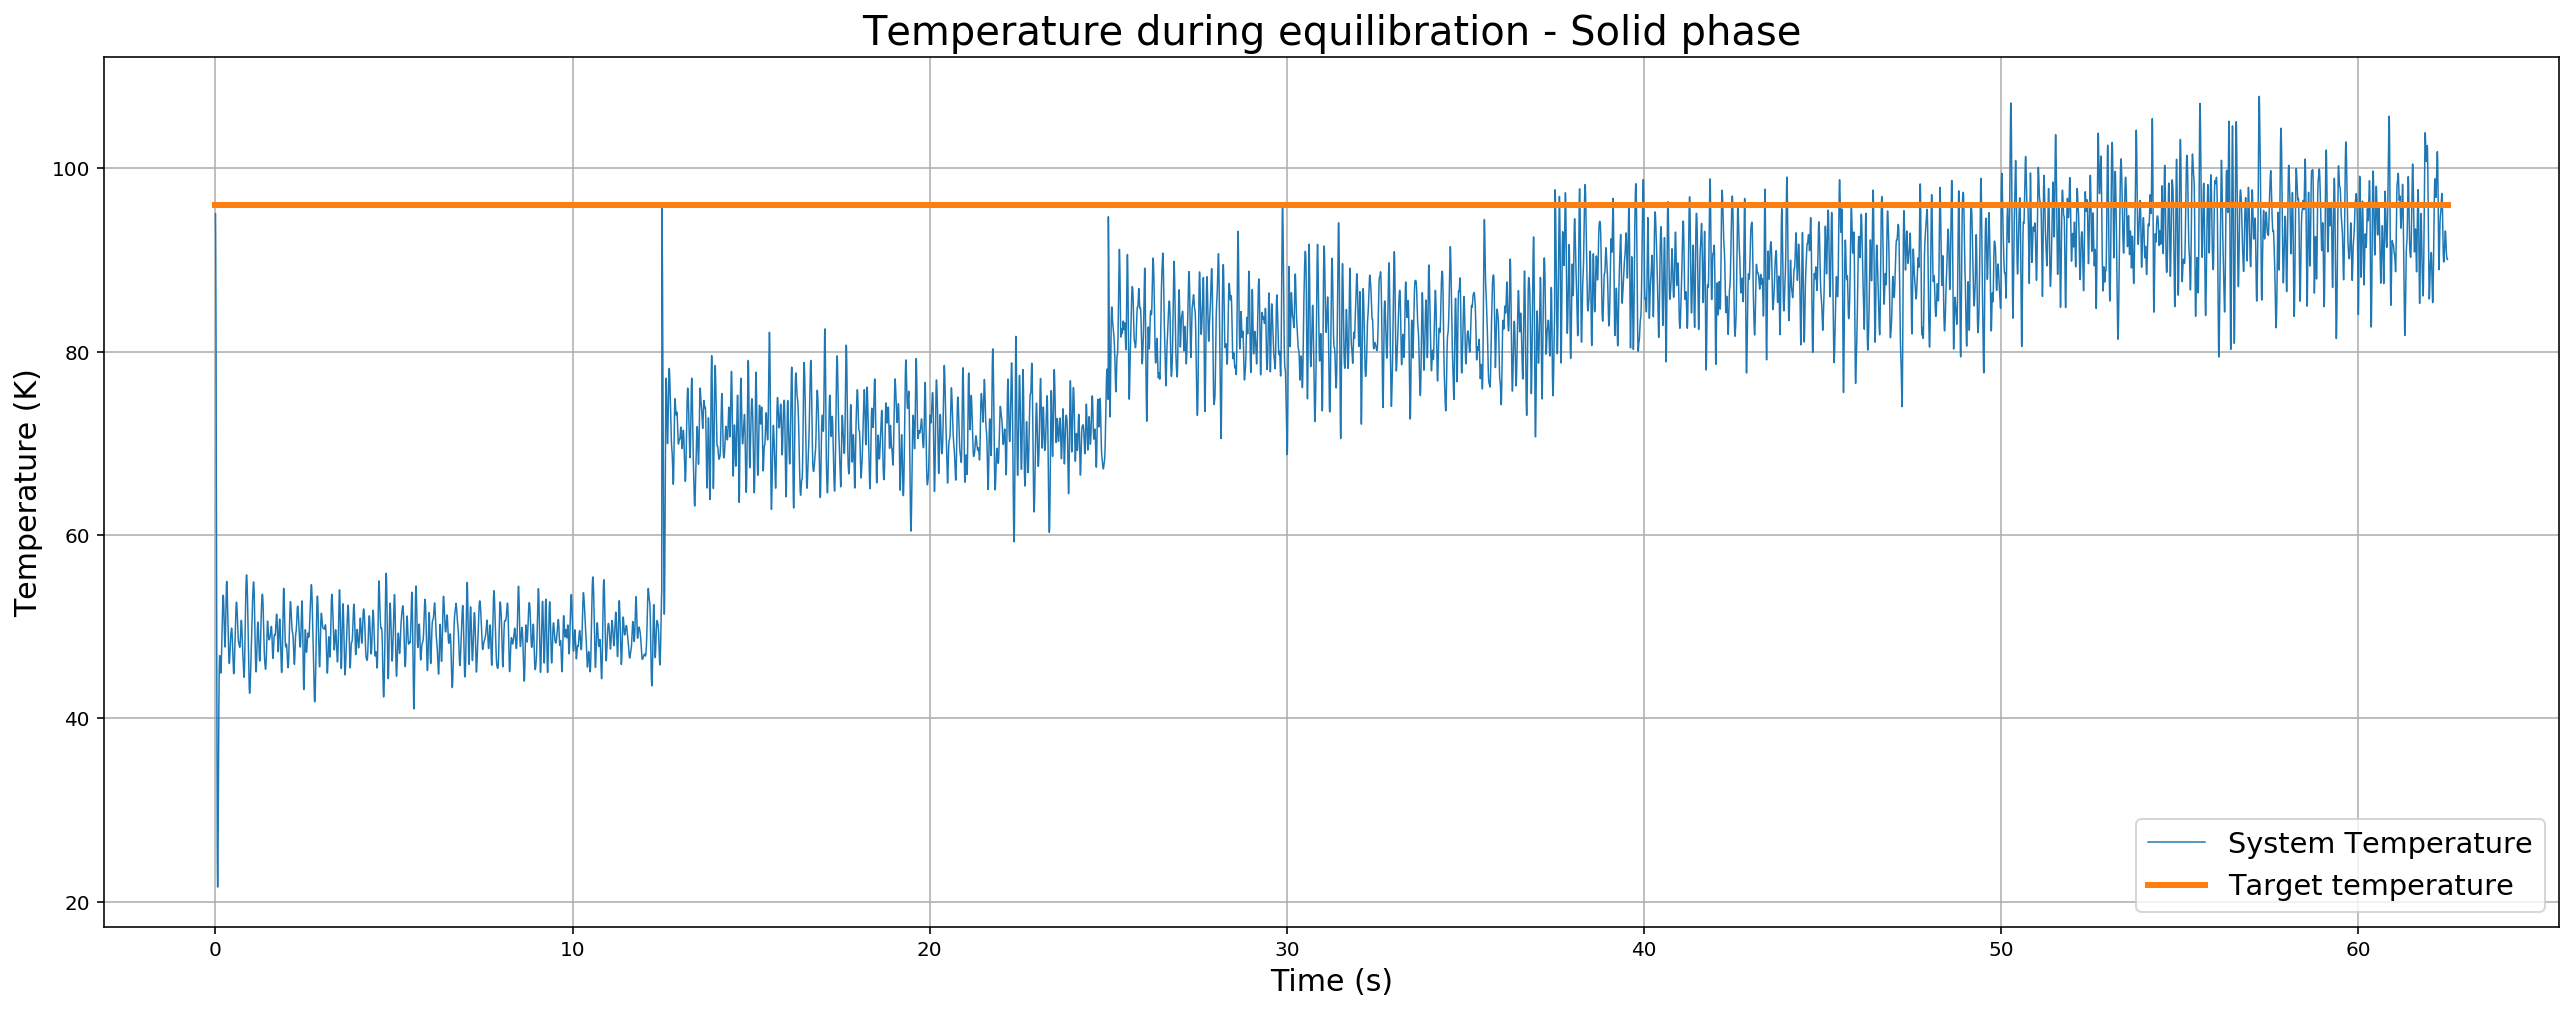

In [2]:
target_T = 0.8 * epsilon_kB
T = epsilon_kB * np.loadtxt("solid/solid_output_temp.dat", unpack=True)
blk=np.arange(len(T)) * 0.005
plt.figure(figsize=(22,8))
plt.title("Temperature during equilibration - Solid phase", fontsize=20)
plt.plot(blk, T, label="System Temperature", linewidth=0.75)
plt.plot([0,blk[len(T)-1]],[target_T,target_T], label ="Target temperature",linewidth=3)
plt.xlabel("Time (s)", fontsize=15)
plt.ylabel("Temperature (K)", fontsize=15)
plt.legend(fontsize="x-large", loc=4)
plt.grid()
plt.show()



#### Misura dei valori istantanei delle grandezze termodinamiche

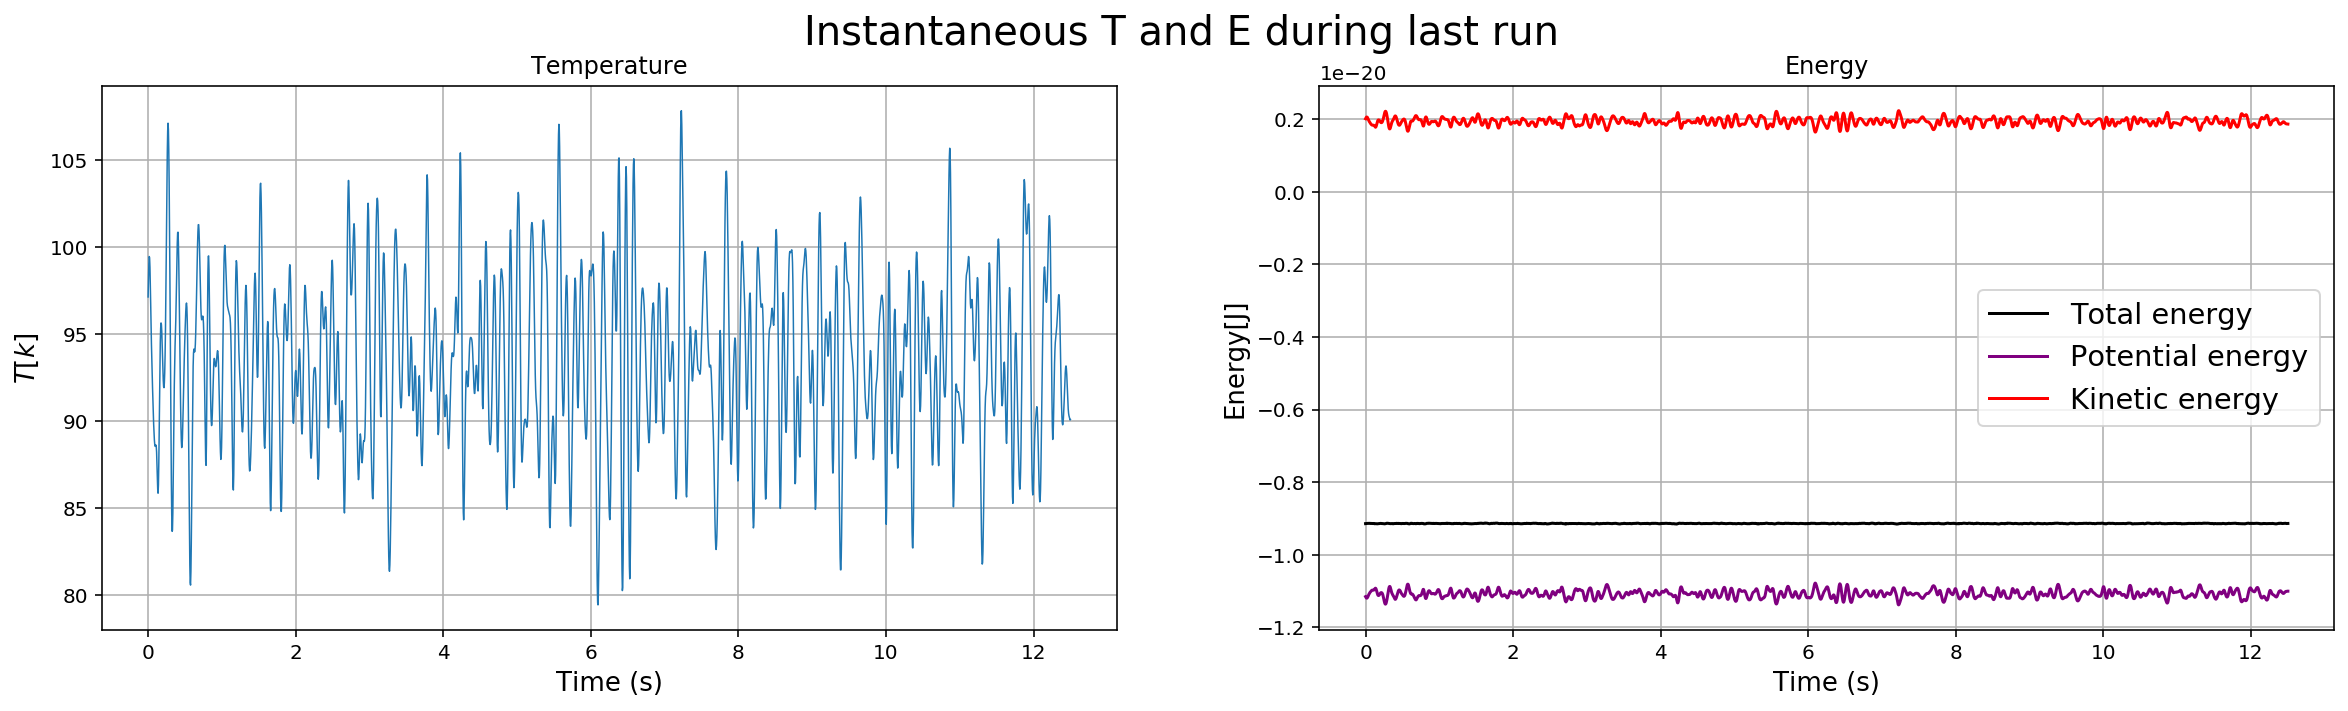

In [3]:
(T_eq) = np.loadtxt('solid/solid_output_temp.dat', unpack=True, usecols=(0), skiprows=10000)
(Etot_eq) = np.loadtxt('solid/solid_output_etot.dat', unpack=True, usecols=(0), skiprows=10000)
(Epot_eq) = np.loadtxt('solid/solid_output_epot.dat', unpack=True, usecols=(0), skiprows=10000)
(Ekin_eq) = np.loadtxt('solid/solid_output_ekin.dat', unpack=True, usecols=(0), skiprows=10000)

fig, axs = plt.subplots(1, 2, figsize=(20,5))
plt.suptitle('Instantaneous T and E during last run', fontsize=20)

T_eq = T_eq*epsilon_kB #converto in SI units
l_eq = len(T_eq)
x_eq = np.linspace(0, l_eq, l_eq)

axs[0].plot(0.005*x_eq, T_eq, linewidth=0.75)
axs[0].set_ylabel('$T[k]$', fontsize=13)
axs[0].set_title("Temperature")

axs[1].set_title("Energy")
axs[1].plot(0.005*x_eq, Etot_eq*epsilon, label='Total energy', color='black')
axs[1].plot(0.005*x_eq, Epot_eq*epsilon, label='Potential energy', color='purple')
axs[1].plot(0.005*x_eq, Ekin_eq*epsilon, label='Kinetic energy', color='red')
axs[1].set_ylabel('Energy[J]', fontsize=13)
axs[1].legend(fontsize='x-large')

for ax in axs.flat:
    ax.set_xlabel('Time (s)', fontsize=13)
    ax.grid()

#### Misura dei valori medi delle grandezze termodinamiche

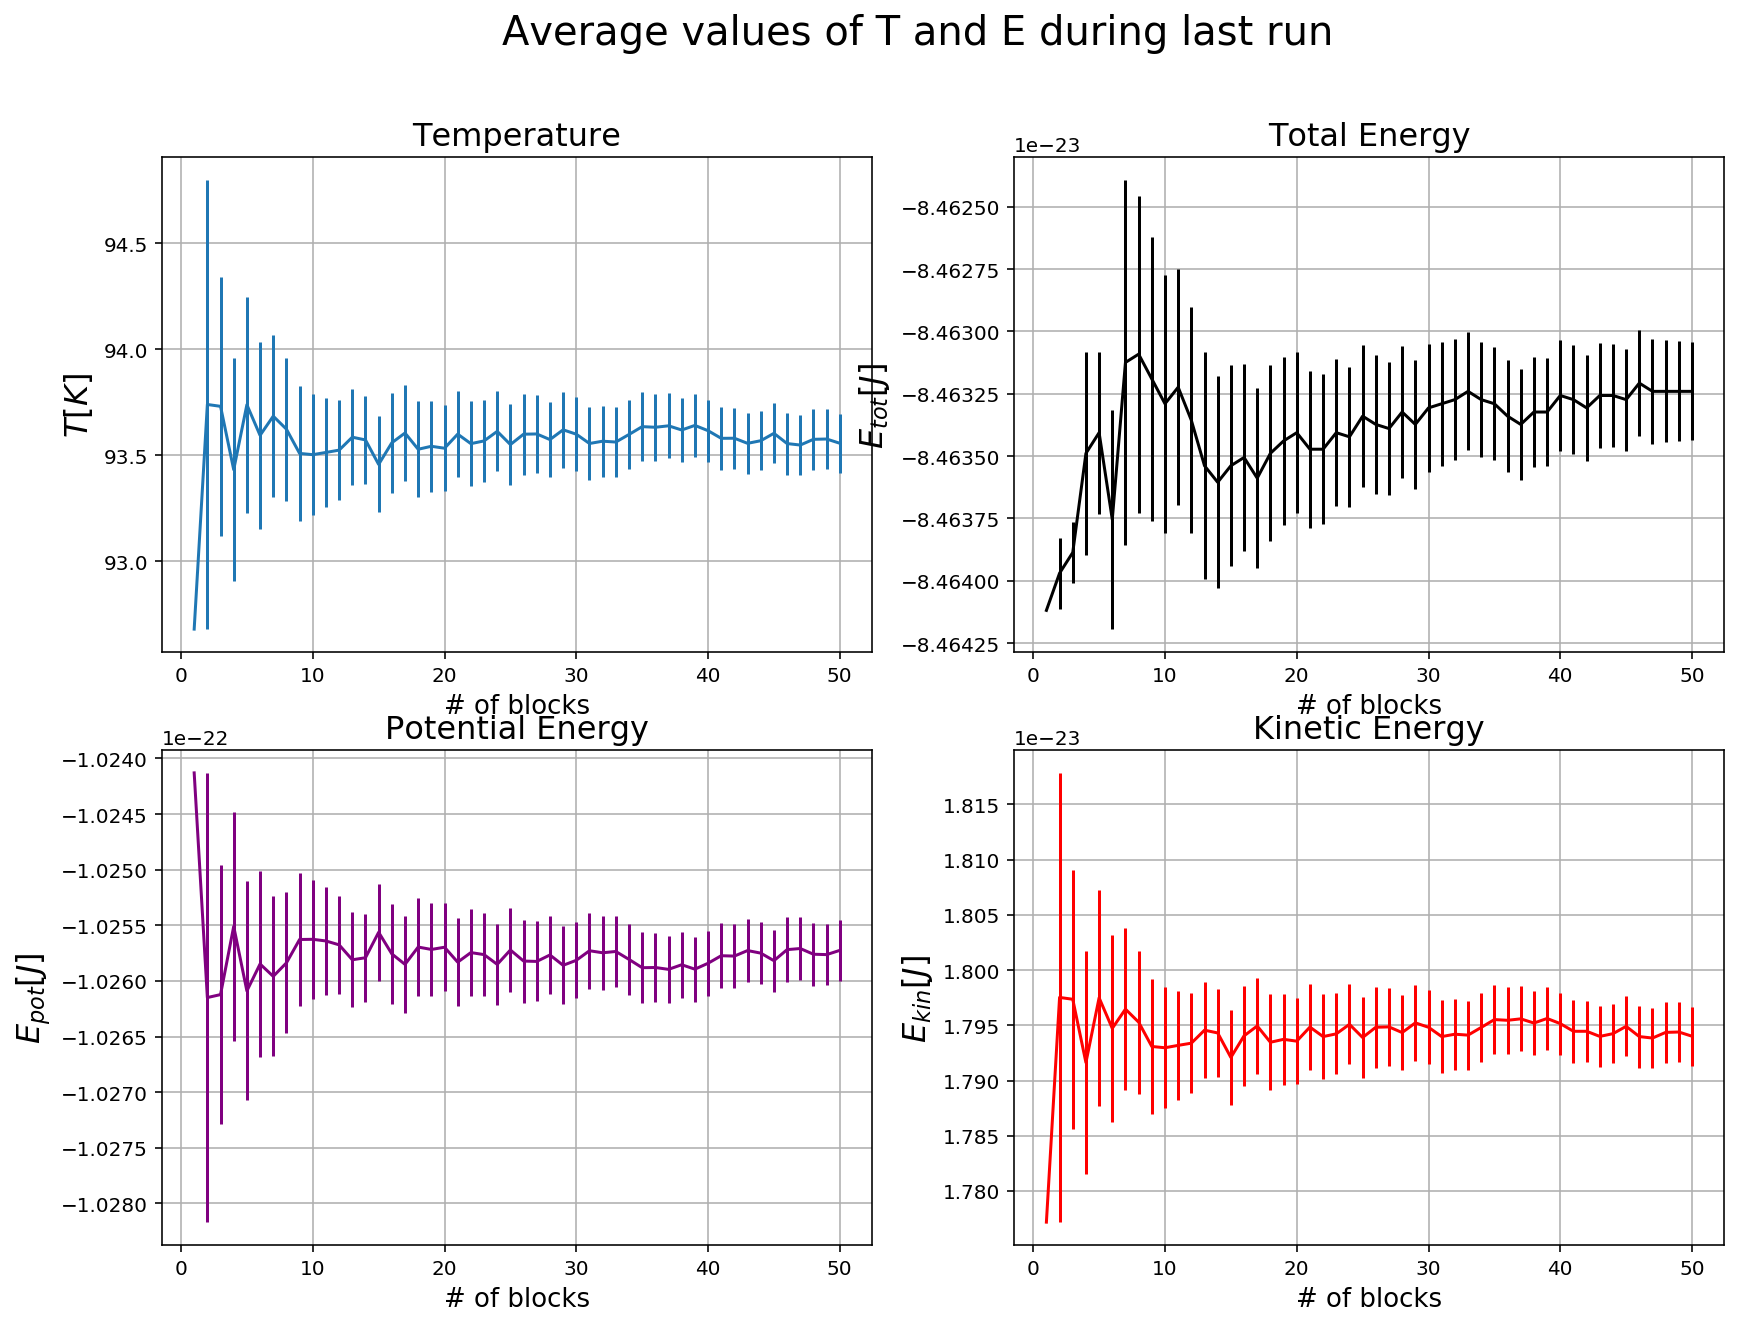

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))

(blk, Ekin, errEkin) = np.loadtxt('solid/solid_ave_ekin.out', unpack=True, usecols=(0,2,3))
Ekin = Ekin*epsilon
errEkin = errEkin*epsilon

(Epot, errEpot) = np.loadtxt('solid/solid_ave_epot.out', unpack=True, usecols=(2,3))
Epot = Epot*epsilon
errEpot = errEpot*epsilon

(Etot, errEtot) = np.loadtxt('solid/solid_ave_etot.out', unpack=True, usecols=(2,3))
Etot = Etot*epsilon
errEtot = errEtot*epsilon

(T, errT) = np.loadtxt('solid/solid_ave_temp.out', unpack=True, usecols=(2,3))
T = T*epsilon_kB #SI units!!
errT = errT*epsilon_kB # also for the errors...

plt.suptitle('Average values of T and E during last run', fontsize=20)

# Temperatura
axs[0,0].set_title("Temperature", fontsize=16)
axs[0,0].errorbar(blk, T, yerr=errT, label='Temperature')
axs[0,0].set_ylabel('$T[K]$', fontsize=16)
#axs[0,0].legend(loc=1, fontsize='large')

# Energia Totale
axs[0,1].set_title("Total Energy", fontsize=16)
axs[0,1].errorbar(blk, Etot, yerr=errEtot, label='Energia totale', color='black')
axs[0,1].set_ylabel('$E_{tot}[J]$', fontsize=16)
#axs[0,1].legend(loc=1, fontsize='large')

# Energia potenziale
axs[1,0].set_title("Potential Energy", fontsize=16)
axs[1,0].errorbar(blk, Epot, yerr=errEpot, label='Energia potenziale', color='purple')
axs[1,0].set_ylabel('$E_{pot}[J]$', fontsize=16)
#axs[1,0].legend(loc=1, fontsize='large')

# Energia cinetica
axs[1,1].set_title("Kinetic Energy", fontsize=16)
axs[1,1].errorbar(blk, Ekin, yerr=errEkin, label='Energia cinetica', color='red')
axs[1,1].set_ylabel('$E_{kin} [J]$', fontsize=16)
#axs[1,1].legend(loc=1, fontsize='large')

for ax in axs.flat:
    ax.set_xlabel('# of blocks', fontsize=13)
    ax.grid()

### Fase liquida

Per simulare l'Argon liquido sono servite 4 simulazioni per far giungere il sistema alla temperatura desiderata, dunque è stato leggermente più veloce della fase solida. Anche in questo caso si osserva un drop della temperatura nel momento in cui si rompe la simmetria fcc. Per il resto valgono tutte le considerazioni fatte per la fase solida, anche perché è stato usato un simile numero di run per equilibrare il sistema, quindi mi aspetto un comportamento simile anche nei grafici dei valori medi, le cui variazioni sono principalme te fluttuazioni attorno al valore di convergenza.

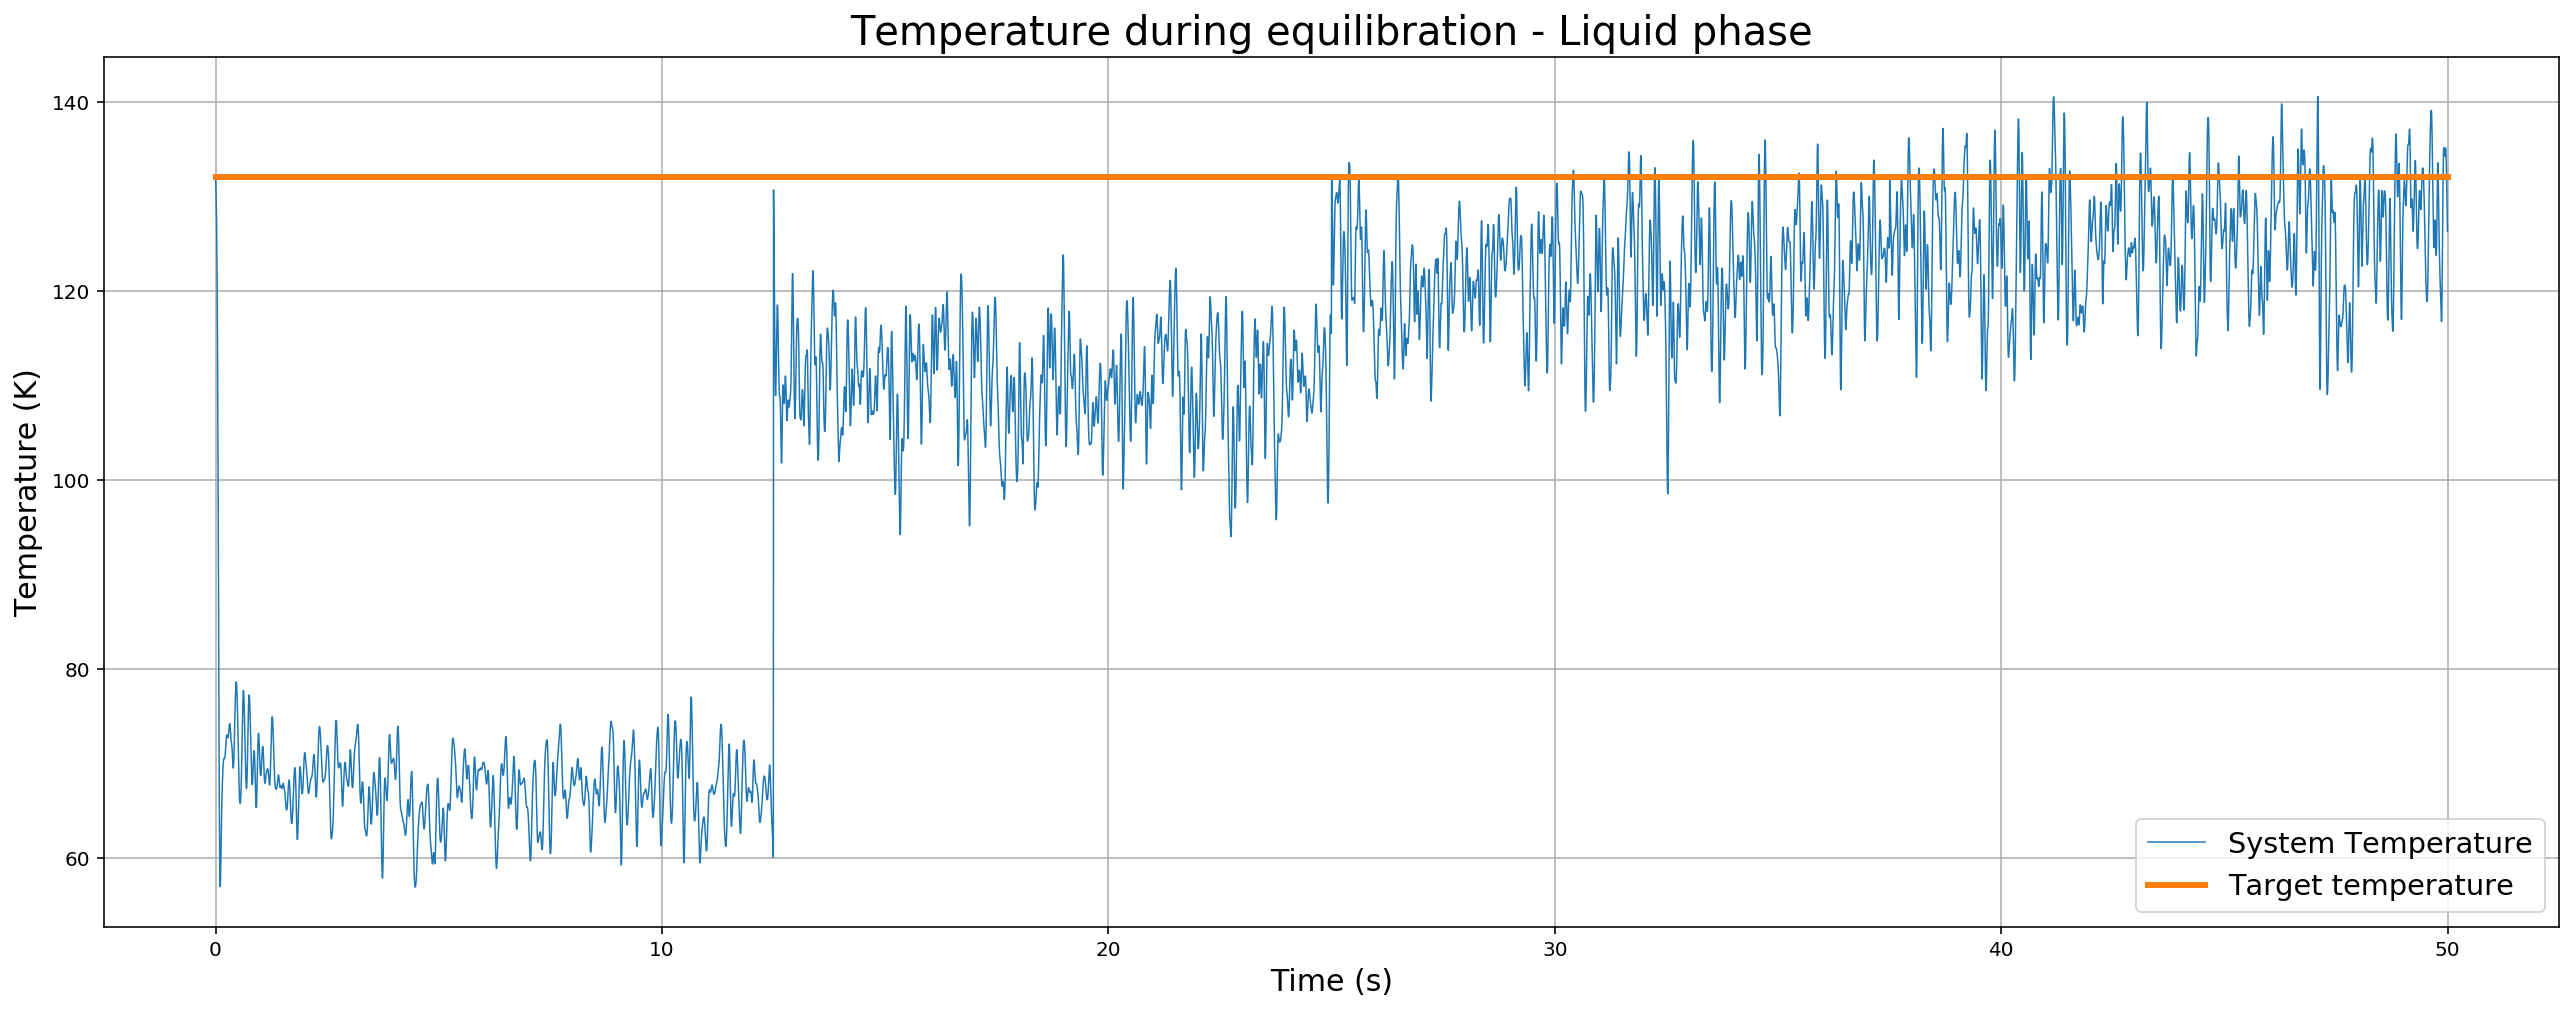

In [14]:
target_T= 1.1 *epsilon_kB

T = epsilon_kB * np.loadtxt("liquid/liquid_output_temp.dat", unpack=True)
blk=np.arange(len(T)) * 0.005
plt.figure(figsize=(22,8))
plt.title("Temperature during equilibration - Liquid phase", fontsize=20)
plt.plot(blk, T, label="System Temperature", linewidth=0.75)
plt.plot([0,blk[len(T)-1]],[target_T,target_T], label ="Target temperature",linewidth=3)
plt.xlabel("Time (s)", fontsize=15)
plt.ylabel("Temperature (K)", fontsize=15)
plt.legend(fontsize="x-large", loc=4)
plt.grid()
plt.show()




#### Misura dei valori istantanei delle grandezze termodinamiche

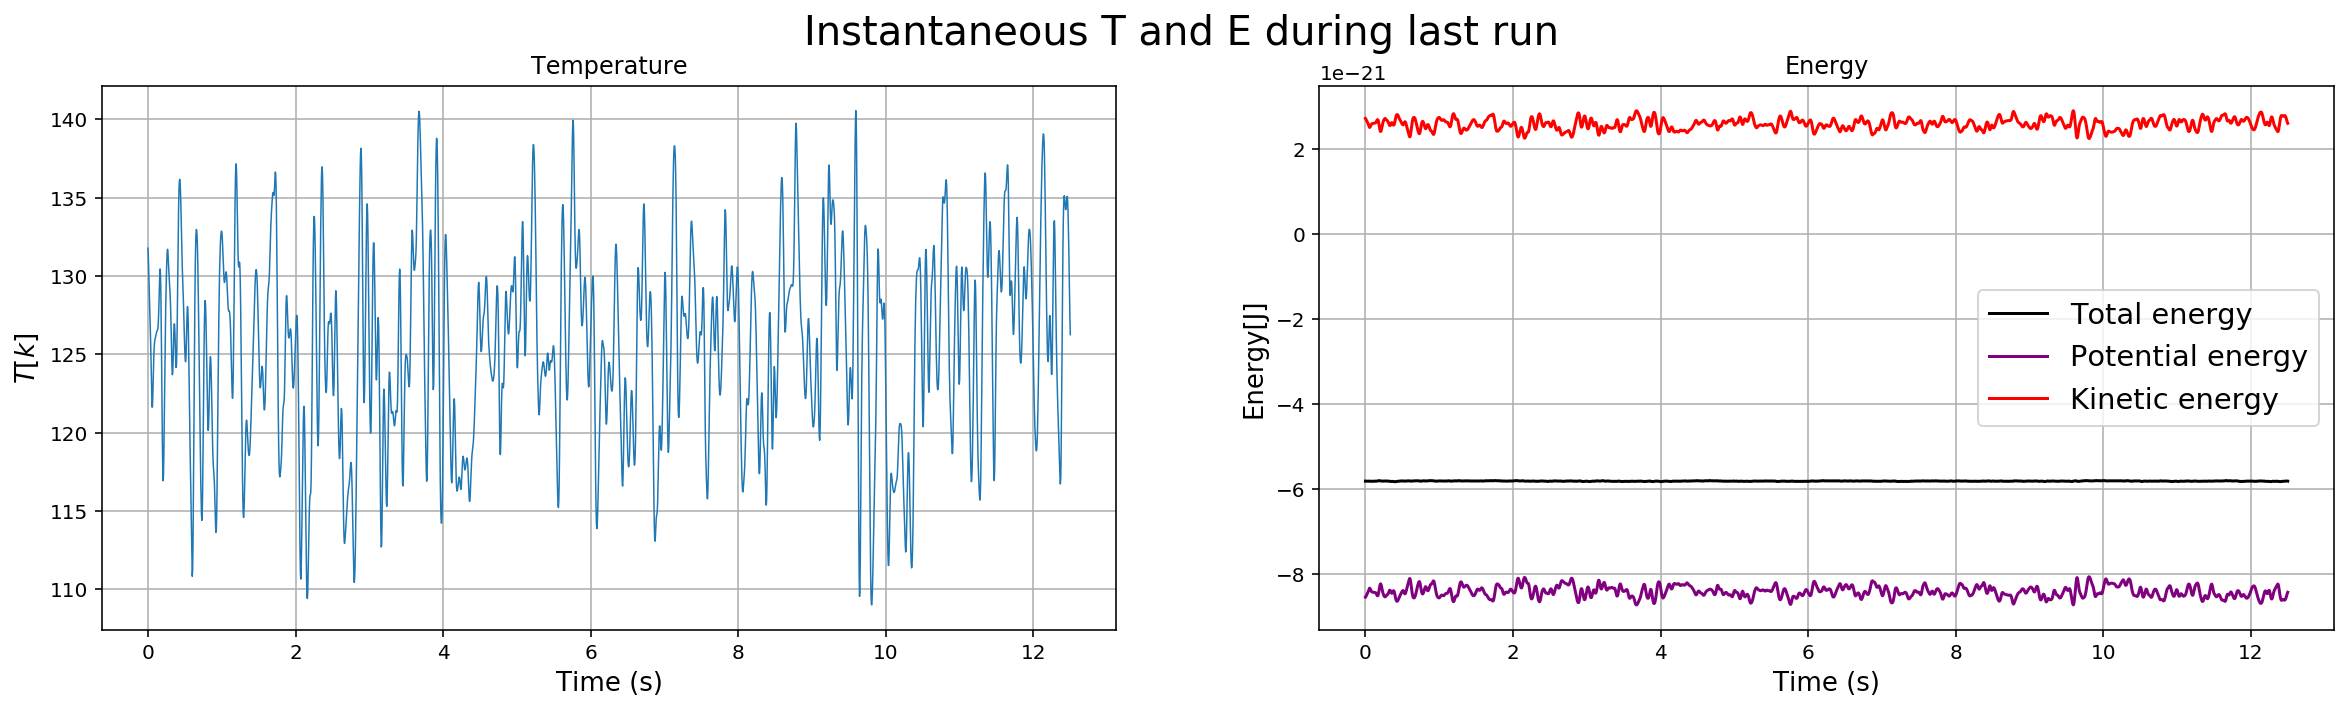

In [6]:
(T_eq) = np.loadtxt('liquid/liquid_output_temp.dat', unpack=True, usecols=(0), skiprows=7500)
(Etot_eq) = np.loadtxt('liquid/liquid_output_etot.dat', unpack=True, usecols=(0), skiprows=7500)
(Epot_eq) = np.loadtxt('liquid/liquid_output_epot.dat', unpack=True, usecols=(0), skiprows=7500)
(Ekin_eq) = np.loadtxt('liquid/liquid_output_ekin.dat', unpack=True, usecols=(0), skiprows=7500)

fig, axs = plt.subplots(1, 2, figsize=(20,5))
plt.suptitle('Instantaneous T and E during last run', fontsize=20)

T_eq = T_eq*epsilon_kB #converto in SI units
l_eq = len(T_eq)
x_eq = np.linspace(0, l_eq, l_eq)

axs[0].plot(0.005*x_eq, T_eq, linewidth=0.75)
axs[0].set_ylabel('$T[k]$', fontsize=13)
axs[0].set_title("Temperature")

axs[1].set_title("Energy")
axs[1].plot(0.005*x_eq, Etot_eq*epsilon, label='Total energy', color='black')
axs[1].plot(0.005*x_eq, Epot_eq*epsilon, label='Potential energy', color='purple')
axs[1].plot(0.005*x_eq, Ekin_eq*epsilon, label='Kinetic energy', color='red')
axs[1].set_ylabel('Energy[J]', fontsize=13)
axs[1].legend(fontsize='x-large')

for ax in axs.flat:
    ax.set_xlabel('Time (s)', fontsize=13)
    ax.grid()

#### Misura dei valori medi delle grandezze termodinamiche

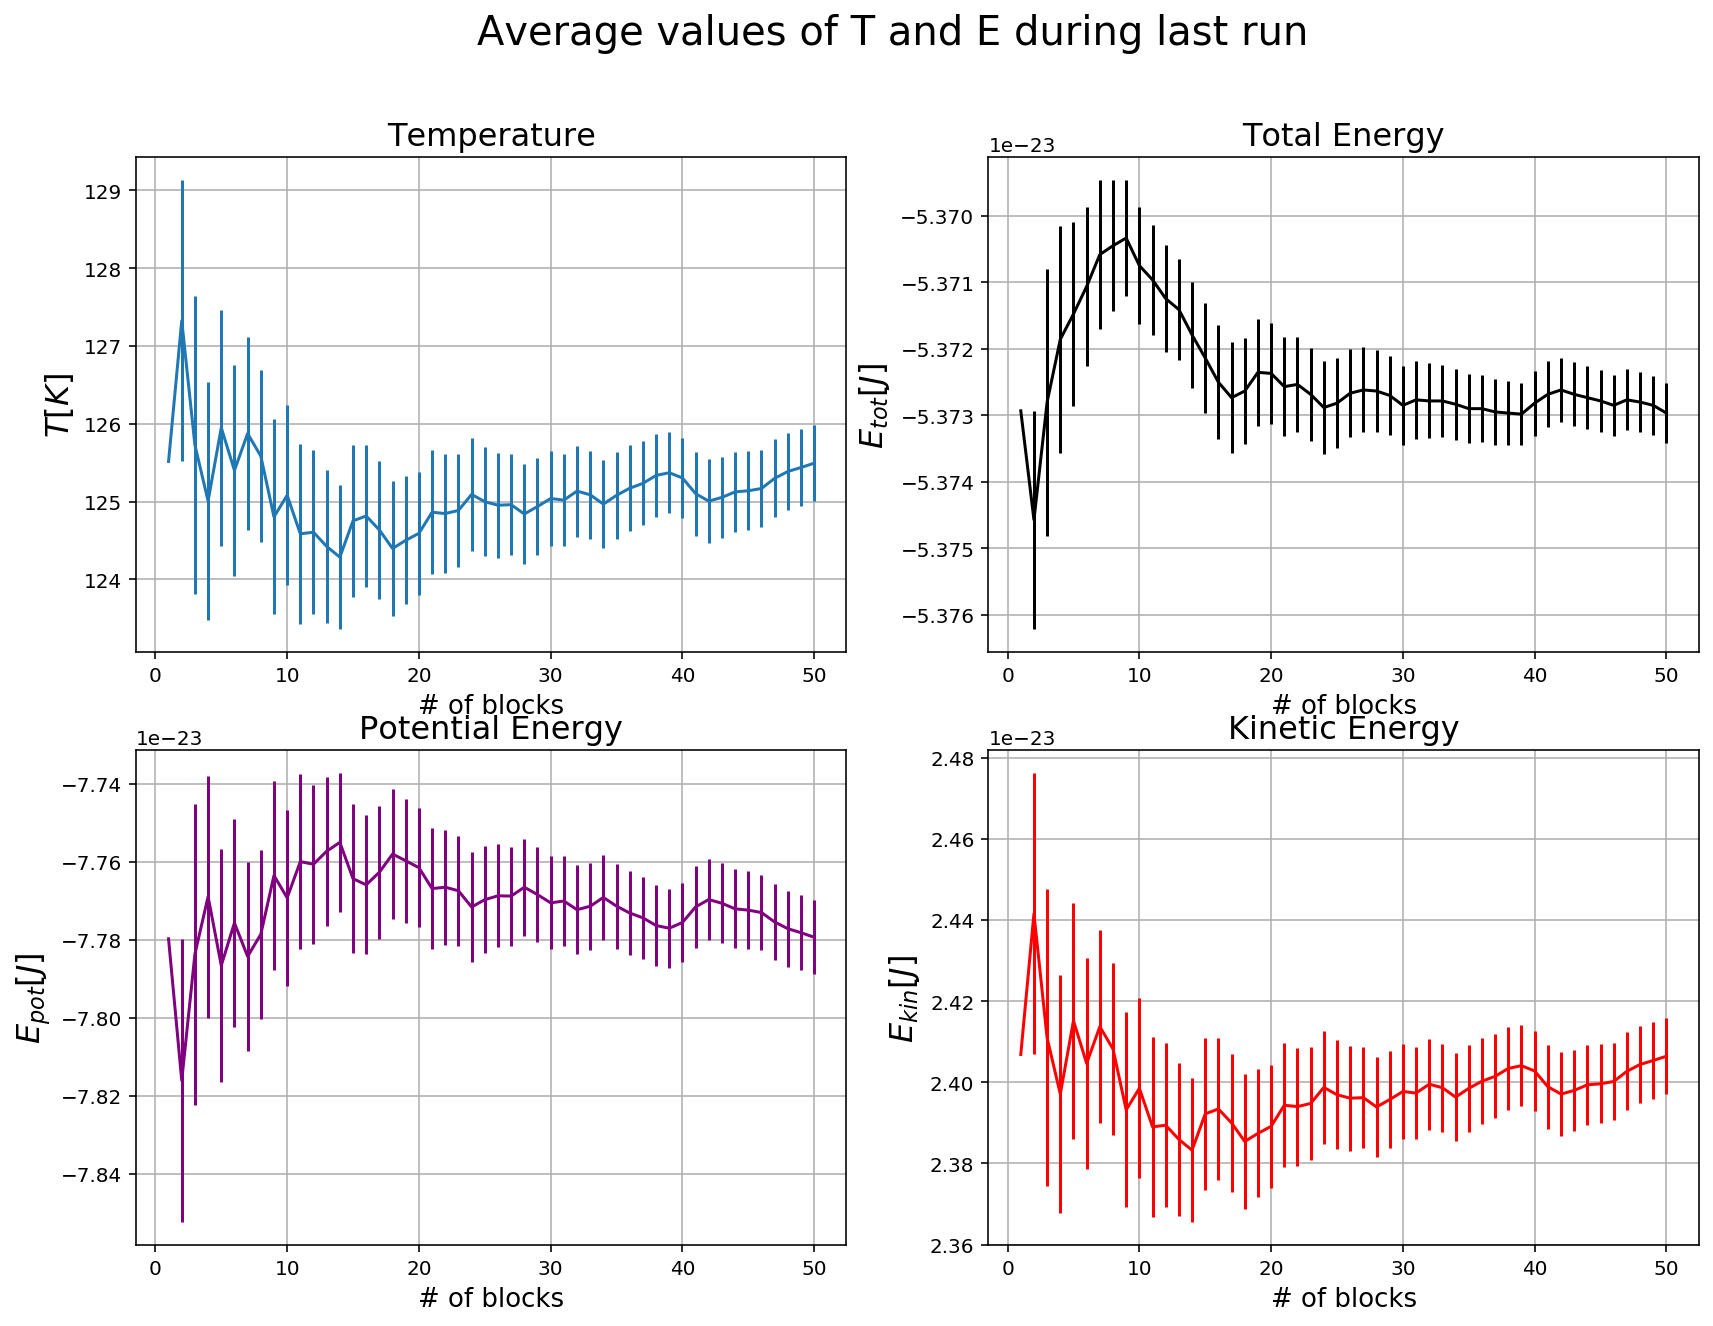

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))

(blk, Ekin, errEkin) = np.loadtxt('liquid/liquid_ave_ekin.out', unpack=True, usecols=(0,2,3))
Ekin = Ekin*epsilon
errEkin = errEkin*epsilon

(Epot, errEpot) = np.loadtxt('liquid/liquid_ave_epot.out', unpack=True, usecols=(2,3))
Epot = Epot*epsilon
errEpot = errEpot*epsilon

(Etot, errEtot) = np.loadtxt('liquid/liquid_ave_etot.out', unpack=True, usecols=(2,3))
Etot = Etot*epsilon
errEtot = errEtot*epsilon

(T, errT) = np.loadtxt('liquid/liquid_ave_temp.out', unpack=True, usecols=(2,3))
T = T*epsilon_kB #SI units!!
errT = errT*epsilon_kB # also for the errors...

plt.suptitle('Average values of T and E during last run', fontsize=20)

# Temperatura
axs[0,0].set_title("Temperature", fontsize=16)
axs[0,0].errorbar(blk, T, yerr=errT, label='Temperature')
axs[0,0].set_ylabel('$T[K]$', fontsize=16)
#axs[0,0].legend(loc=1, fontsize='large')

# Energia Totale
axs[0,1].set_title("Total Energy", fontsize=16)
axs[0,1].errorbar(blk, Etot, yerr=errEtot, label='Energia totale', color='black')
axs[0,1].set_ylabel('$E_{tot}[J]$', fontsize=16)
#axs[0,1].legend(loc=1, fontsize='large')

# Energia potenziale
axs[1,0].set_title("Potential Energy", fontsize=16)
axs[1,0].errorbar(blk, Epot, yerr=errEpot, label='Energia potenziale', color='purple')
axs[1,0].set_ylabel('$E_{pot}[J]$', fontsize=16)
#axs[1,0].legend(loc=1, fontsize='large')

# Energia cinetica
axs[1,1].set_title("Kinetic Energy", fontsize=16)
axs[1,1].errorbar(blk, Ekin, yerr=errEkin, label='Energia cinetica', color='red')
axs[1,1].set_ylabel('$E_{kin} [J]$', fontsize=16)
#axs[1,1].legend(loc=1, fontsize='large')

for ax in axs.flat:
    ax.set_xlabel('# of blocks', fontsize=13)
    ax.grid()

### Fase gassosa

Per la simulazione in fase gassosa sono state necessarie 10 run per osservare una convergenza della temperatura verso la temperatura di target. In realtà, nemmeno dopo 10 ripetizioni si raggiunge una convergenza netta come nei primi due casi: questo mi porta a supporre che:
- La fase gassosa è modellizzata in modo peggiore da questo codice, perchè non si raggiunge una buona convergenza in breve tempo.
- La configurazione iniziale fcc perde leggermente di significato quando si parla di fase gassosa, perchè le forze intermolecolari sono trascurabili rispetto al caso solido e liquido. 
- Questo spiega anche perchè non si osserva il drop immediato di temperatura dovuto alla rottura della simmetria fcc che invece era ben visibile durante la fase liquida e la fase gassosa. 

Per il resto, gli altri risultati (valori istantanei e valori medi dell'energia) sono compatibili con quelli delle alrte due simulazioni: ad esempio si nota come il passo Verlet continui a conservare l'energia e di come la media a blocchi porti ad errori sempre più piccoli.
Da ultimo, si osserva che l'energia totale del sistema è positiva (il temrine cinetico è maggiore di quello potenziale), cioè in fase gassosa il sistema non si trova in uno stato legato.

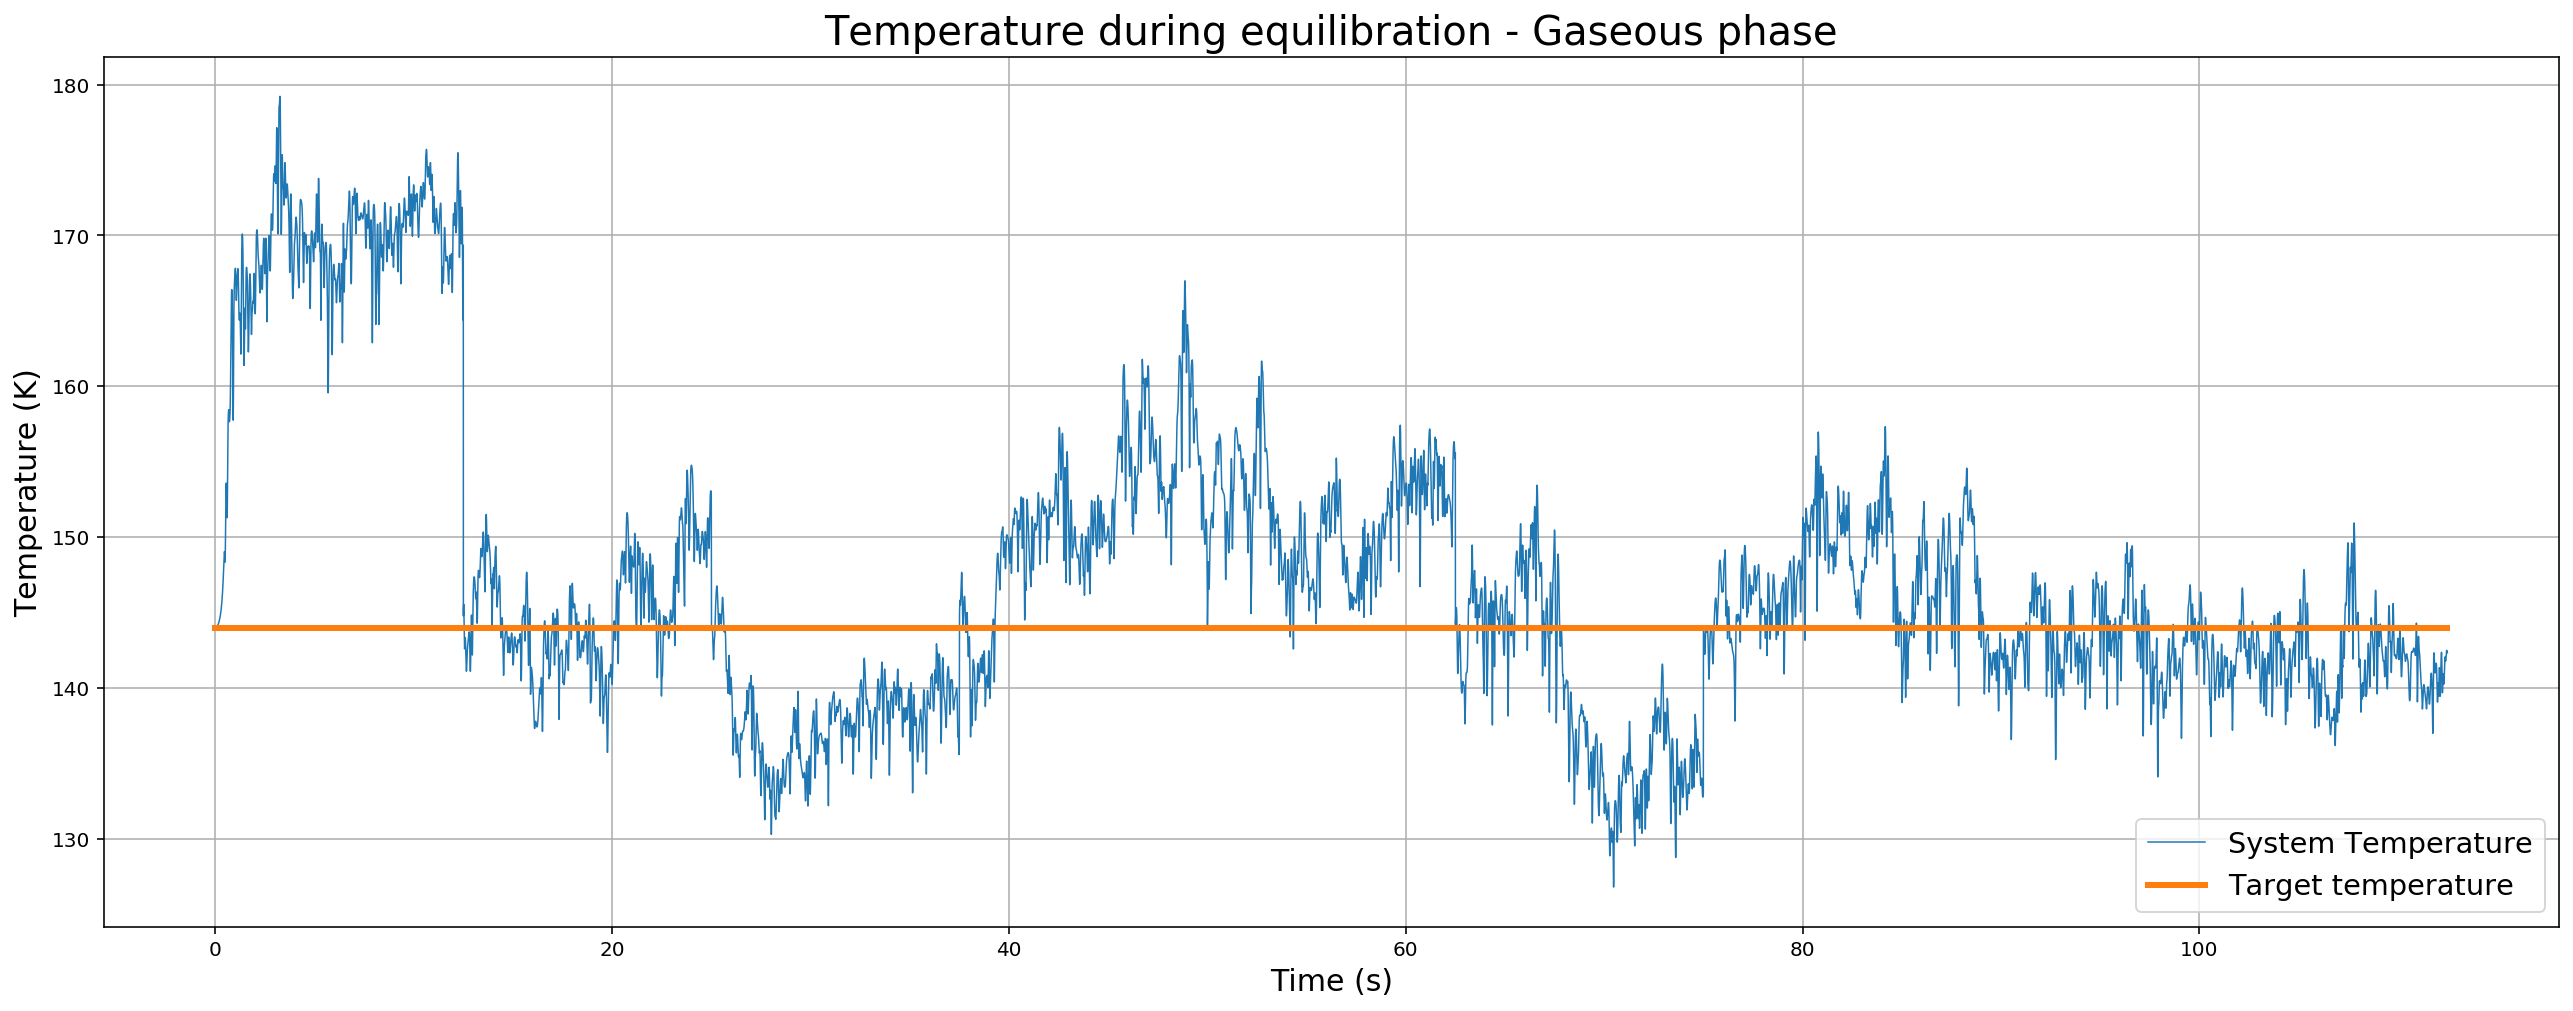

In [10]:
target_T= 1.2 *epsilon_kB

T = epsilon_kB * np.loadtxt("gas/gas_output_temp.dat", unpack=True)
blk=np.arange(len(T)) * 0.005
plt.figure(figsize=(22,8))
plt.title("Temperature during equilibration - Gaseous phase", fontsize=20)
plt.plot(blk, T, label="System Temperature", linewidth=0.75)
plt.plot([0,blk[len(T)-1]],[target_T,target_T], label ="Target temperature",linewidth=3)
plt.xlabel("Time (s)", fontsize=15)
plt.ylabel("Temperature (K)", fontsize=15)
plt.legend(fontsize="x-large", loc=4)
plt.grid()
plt.show()

#### Misura dei valori istantanei delle grandezze termodinamiche

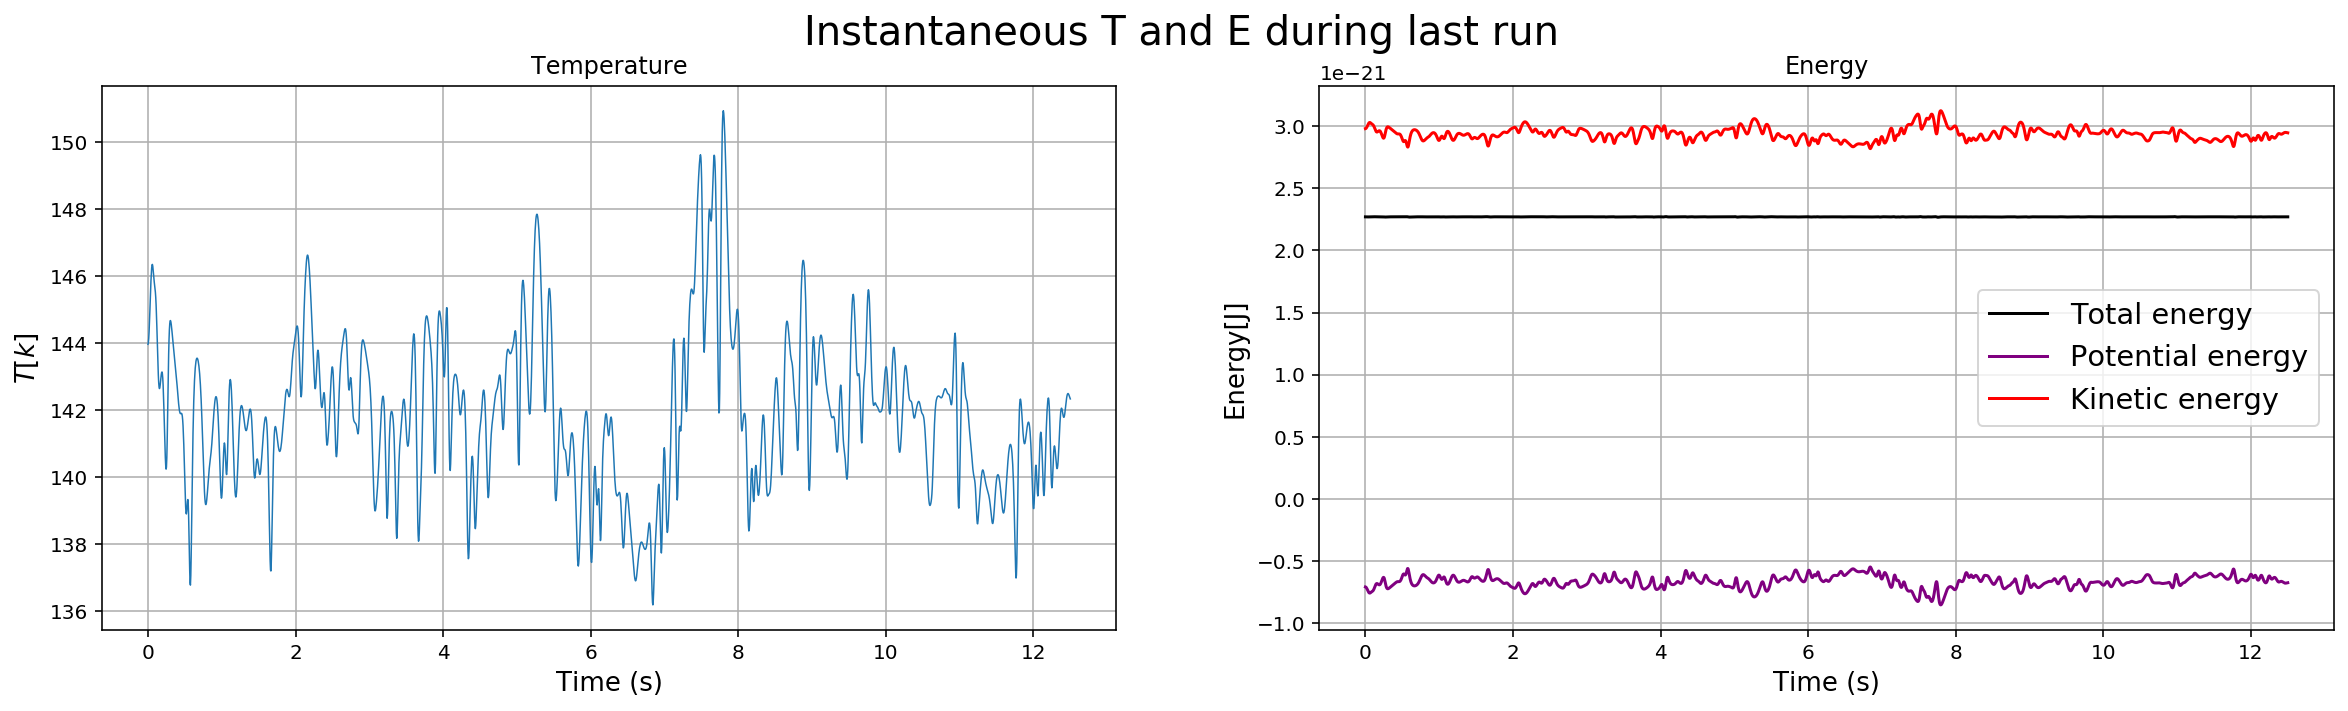

In [11]:
(T_eq) = np.loadtxt('gas/gas_output_temp.dat', unpack=True, usecols=(0), skiprows=20000)
(Etot_eq) = np.loadtxt('gas/gas_output_etot.dat', unpack=True, usecols=(0), skiprows=20000)
(Epot_eq) = np.loadtxt('gas/gas_output_epot.dat', unpack=True, usecols=(0), skiprows=20000)
(Ekin_eq) = np.loadtxt('gas/gas_output_ekin.dat', unpack=True, usecols=(0), skiprows=20000)

fig, axs = plt.subplots(1, 2, figsize=(20,5))
plt.suptitle('Instantaneous T and E during last run', fontsize=20)

T_eq = T_eq*epsilon_kB #converto in SI units
l_eq = len(T_eq)
x_eq = np.linspace(0, l_eq, l_eq)

axs[0].plot(0.005*x_eq, T_eq, linewidth=0.75)
axs[0].set_ylabel('$T[k]$', fontsize=13)
axs[0].set_title("Temperature")

axs[1].set_title("Energy")
axs[1].plot(0.005*x_eq, Etot_eq*epsilon, label='Total energy', color='black')
axs[1].plot(0.005*x_eq, Epot_eq*epsilon, label='Potential energy', color='purple')
axs[1].plot(0.005*x_eq, Ekin_eq*epsilon, label='Kinetic energy', color='red')
axs[1].set_ylabel('Energy[J]', fontsize=13)
axs[1].legend(fontsize='x-large')

for ax in axs.flat:
    ax.set_xlabel('Time (s)', fontsize=13)
    ax.grid()

#### Misura dei valori medi delle grandezze termodinamiche

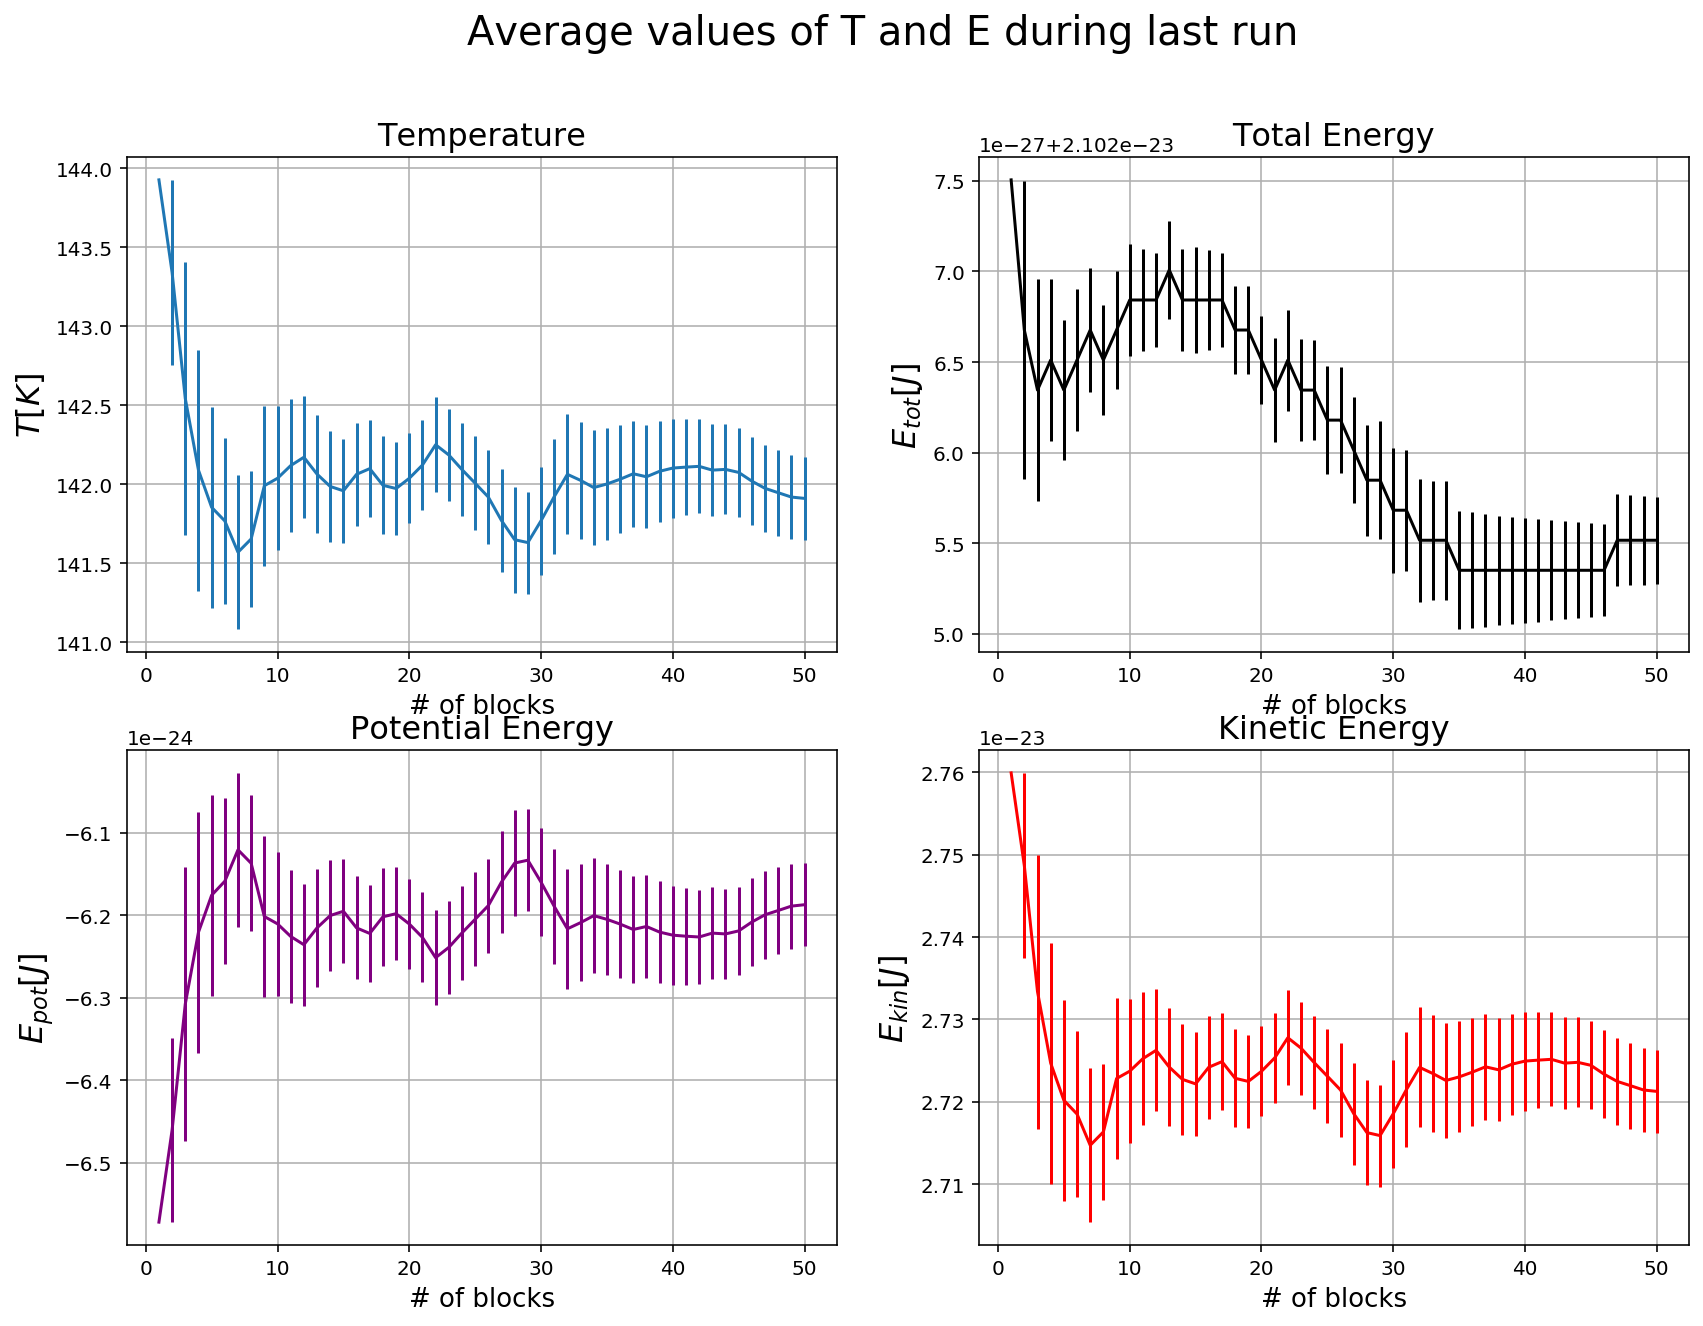

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))

(blk, Ekin, errEkin) = np.loadtxt('gas/gas_ave_ekin.out', unpack=True, usecols=(0,2,3))
Ekin = Ekin*epsilon
errEkin = errEkin*epsilon

(Epot, errEpot) = np.loadtxt('gas/gas_ave_epot.out', unpack=True, usecols=(2,3))
Epot = Epot*epsilon
errEpot = errEpot*epsilon

(Etot, errEtot) = np.loadtxt('gas/gas_ave_etot.out', unpack=True, usecols=(2,3))
Etot = Etot*epsilon
errEtot = errEtot*epsilon

(T, errT) = np.loadtxt('gas/gas_ave_temp.out', unpack=True, usecols=(2,3))
T = T*epsilon_kB #SI units!!
errT = errT*epsilon_kB # also for the errors...

plt.suptitle('Average values of T and E during last run', fontsize=20)

# Temperatura
axs[0,0].set_title("Temperature", fontsize=16)
axs[0,0].errorbar(blk, T, yerr=errT, label='Temperature')
axs[0,0].set_ylabel('$T[K]$', fontsize=16)
#axs[0,0].legend(loc=1, fontsize='large')

# Energia Totale
axs[0,1].set_title("Total Energy", fontsize=16)
axs[0,1].errorbar(blk, Etot, yerr=errEtot, label='Energia totale', color='black')
axs[0,1].set_ylabel('$E_{tot}[J]$', fontsize=16)
#axs[0,1].legend(loc=1, fontsize='large')

# Energia potenziale
axs[1,0].set_title("Potential Energy", fontsize=16)
axs[1,0].errorbar(blk, Epot, yerr=errEpot, label='Energia potenziale', color='purple')
axs[1,0].set_ylabel('$E_{pot}[J]$', fontsize=16)
#axs[1,0].legend(loc=1, fontsize='large')

# Energia cinetica
axs[1,1].set_title("Kinetic Energy", fontsize=16)
axs[1,1].errorbar(blk, Ekin, yerr=errEkin, label='Energia cinetica', color='red')
axs[1,1].set_ylabel('$E_{kin} [J]$', fontsize=16)
#axs[1,1].legend(loc=1, fontsize='large')

for ax in axs.flat:
    ax.set_xlabel('# of blocks', fontsize=13)
    ax.grid()